<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


In [3]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [4]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [ ]:
FIN.head()

In [ ]:
FTC.head()

In [ ]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [ ]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
plt.legend(['FIN',"FTC"])

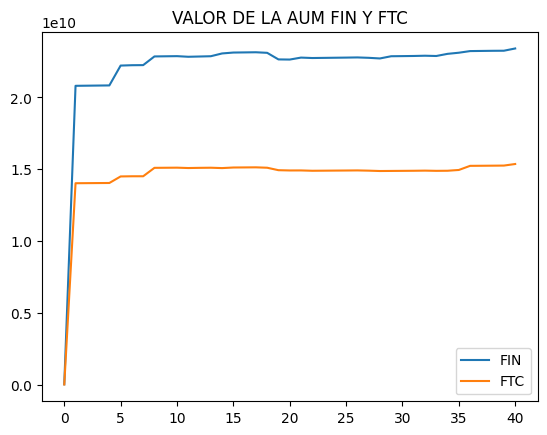

In [9]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [ ]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

In [35]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

36    15,243,218,158,57
37    15,249,061,950,38
38    15,255,209,882,16
39    15,262,204,110,35
40    15,371,120,891,18
Name: Valor Fondo, dtype: object

In [10]:
nivel_confianza = 0.95

In [11]:
FIN['Valor Unidad'].head()

0    1000.00
1     988.22
2     988.66
3     989.10
4     989.55
Name: Valor Unidad, dtype: float64

In [12]:
FIN['Rentab Diaria'].head()

0    0.00
1   -0.99
2    0.18
3    0.18
4    0.18
Name: Rentab Diaria, dtype: float64

In [13]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

0    0.000000e+00
1   -1.389318e+10
2    2.246273e+09
3    2.247185e+09
4    2.248097e+09
dtype: float64

In [14]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

0    0.000000e+00
1   -2.060431e+10
2    3.747903e+09
3    3.749577e+09
4    3.751251e+09
dtype: float64

In [15]:
var_FTC = np.percentile(Retorno_FTC, (1 - nivel_confianza) * 100)

In [16]:
var_FIN = np.percentile(Retorno_FIN, (1 - nivel_confianza) * 100)

# **VaR FTC**

In [36]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -7.404.824.184,50


# **VaR FIN**

In [37]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -11.416.962.859,02


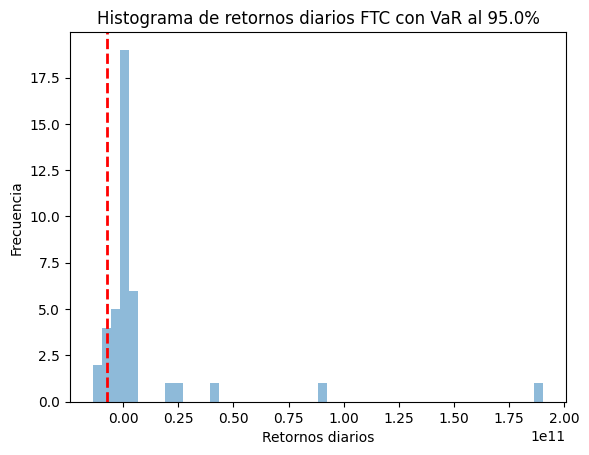

In [38]:
plt.hist(Retorno_FTC , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-39-c9d723731fc9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FTC, shade=True)


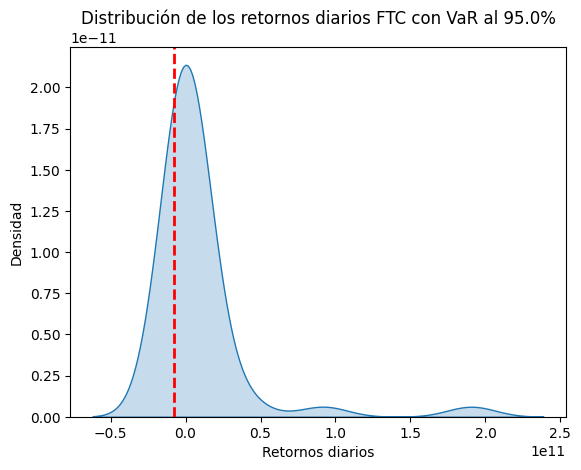

In [39]:
sns.kdeplot(Retorno_FTC, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

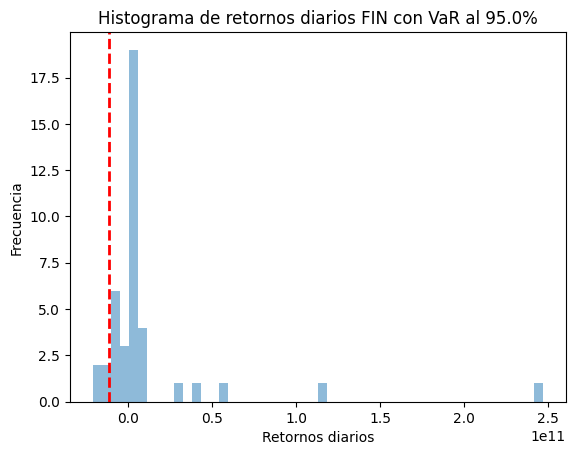

In [40]:
plt.hist(Retorno_FIN , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-41-f91fb862fd29>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FIN, shade=True)


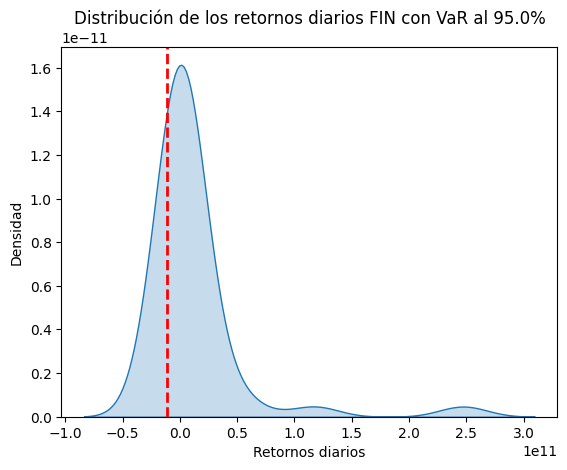

In [41]:
sns.kdeplot(Retorno_FIN, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()